sommets du graph [('10.000000000000000', '10.000000000000000'), ('10.000000000000000', '20.000000000000000'), ('20.000000000000000', '10.000000000000000'), ('20.000000000000000', '20.000000000000000')]
sommets du Steiner [('17.113248654051873', '15.000000000000000'), ('12.886751345948128', '15.000000000000000')]


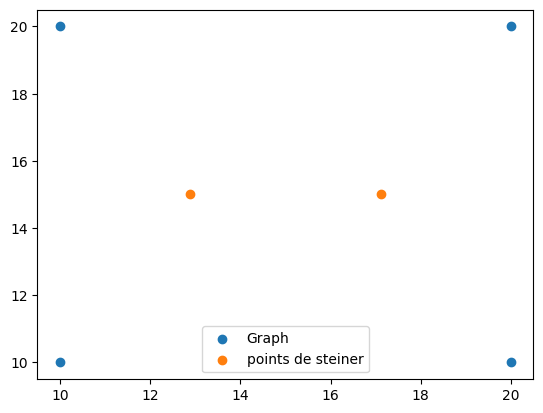

In [2]:
from EST import EST

estprob = EST("square.tsp")
estprob.solve()
estprob.draw()